In [4]:
from scipy import stats
import numpy as np

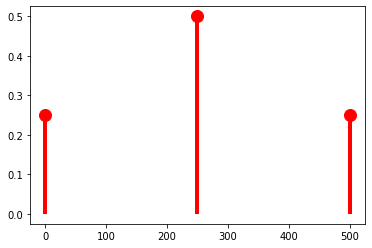

(array([21.,  0.,  0.,  0.,  0., 55.,  0.,  0.,  0., 24.]),
 array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.]),
 <BarContainer object of 10 artists>)

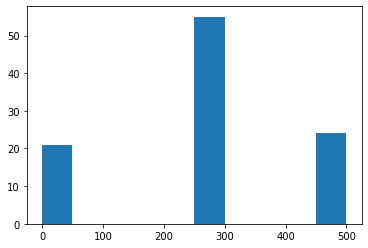

In [5]:
xk = [0, 250, 500]
pk = (.25, .5, .25)

def get_dist(xk, pk):
    return stats.rv_discrete(name='custm', values=(xk, pk))

custm = get_dist(xk, pk)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm.pmf(xk), 'ro', ms=12, mec='r')
ax.vlines(xk, 0, custm.pmf(xk), colors='r', lw=4)
plt.show()

R = custm.rvs(size=100)
plt.hist(R)



In [6]:
custm.rvs()

0

In [7]:
import sqlite3
con = sqlite3.connect("db.sqlite3")
cur = con.cursor()

for row in cur.execute('SELECT * from rounds_order'):
    print(row)
print([x[0] for x in cur.description])
# Be sure to close the connection
con.close()

['id', 'order_type', 'price', 'quantity', 'quantity_final', 'is_buy_in', 'player_id', 'group_id']


In [9]:
import pandas as pd
import contextlib

def get_df_for_q(q):
    with contextlib.closing(sqlite3.connect("db.sqlite3")) as con:
        df = pd.read_sql(q, con)

    return df

#get_df_for_q('SELECT * FROM rounds_player WHERE session_id = 6')

get_df_for_q('''
SELECT o.*, p.id_in_group, p.round_number, p.session_id , p.shares_transacted
FROM rounds_player p JOIN rounds_order o ON p.id = o.player_id 
WHERE p.session_id = 10''' )

#get_df_for_q('select * from sqlite_master where type="table"')
#get_df_for_q('select * from otree_session')


,id,order_type,price,quantity,quantity_final,is_buy_in,player_id,group_id,id_in_group,round_number,session_id,shares_transacted
